### Project Objective

Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

Key Questions to answer:
1. Explore the dataset and extract insights using Exploratory Data Analysis
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint - Formulate a hypothesis and prove/disprove it]
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions? [Hint: Create a contingency table/cross tab use the function: stats. chi2_contingency()]
5.Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Assumptions
The  Health Insurance customer's data is a simple random sample from the population data.

### About the data-
AxisInsurance.csv - contains information about customers of the Axis Health Insurance.

1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. BMI = weight(kg)/height(m2). An Ideal BMI is within the range of 18.5 to 24.9.
4. Children - This an integer indicating the number of children/dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges - Individual medical costs billed by health insurance.

### Exploratory Data Analysis - Step by step approach

Typical Data exploratory activity consists of the following steps:

1. Importing Data
2. Variable Identification
3. Univariate Analysis
4. Bi-Variate Analysis
5. Variable Transformation / Feature Creation

### Importing all the necessary libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set() #setting the default seaborn
import warnings
warnings.simplefilter(action="ignore")

### Read the data into the notebook

In [17]:
df = pd.read_csv(r"C:\Users\Omast\OneDrive\Desktop\Axis\AxisInsurance.csv")  # read the data as a data frame

### View the first and last 5 rows of the dataset

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understanding the shape of the dataset.

In [14]:
df.shape

(1338, 7)

* The dataframe consist of 1338 observations and 7 variables

### Check the data types of the columns for the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Fixing the data types

* Sex, smoker and region are objects, we can change them to categories.

Coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis

In [21]:
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")
df["region"] = df["region"].astype("category")

#df['sex'] = pd.Categorical(df.sex)

### Checking for missing values

In [23]:
df.isna().sum() # null value check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no null values in any of the column

### Five point summary of continuous variables

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Data looks legitimate as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the peolple have 2 or less children.
* The claimed amount is highly skewed as most people would require basic medicare and only few suffer from diseases which cost more.

### Summary of categorical variables

In [29]:
df.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* The data contains both male and female insurance holders
* The number of smokers in the data is much less than the non smokers.
* The insurance holders from southeast region of U.S are more frequent than the others

### Exploratory Data Analysis

Univariate analysis

In [32]:
def histogram_boxplot(data, xlabel=None, title=None, font_scale=2, figsize=(15, 7), bins=None):
    """
    Function to create a boxplot and histogram for a given numerical dataset.
    
    Parameters:
    data (array-like): 1D numerical data
    xlabel (str, optional): Label for the x-axis
    title (str, optional): Title for the plot
    font_scale (float, optional): Scale for font size (default is 2)
    figsize (tuple, optional): Figure size (default is (15, 7))
    bins (int, optional): Number of bins for histogram (default is None, auto-selected)

    Returns:
    None (Displays the plot)
    """
    mean = np.mean(data)

    sns.set_theme(style="whitegrid", font_scale=font_scale)

    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize
    )

    sns.boxplot(x=data, ax=ax_box, showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red"}, color="violet")
    sns.histplot(data, bins=bins, kde=False, ax=ax_hist, color="black")

    ax_hist.axvline(mean, color='g', linestyle='--', label=f"Mean: {mean:.2f}")
    ax_hist.legend()

    if xlabel:
        ax_hist.set_xlabel(xlabel, fontsize=14)
    if title:
        ax_box.set_title(title, fontsize=16)

    
    plt.show() # for plotting the graph

### Age

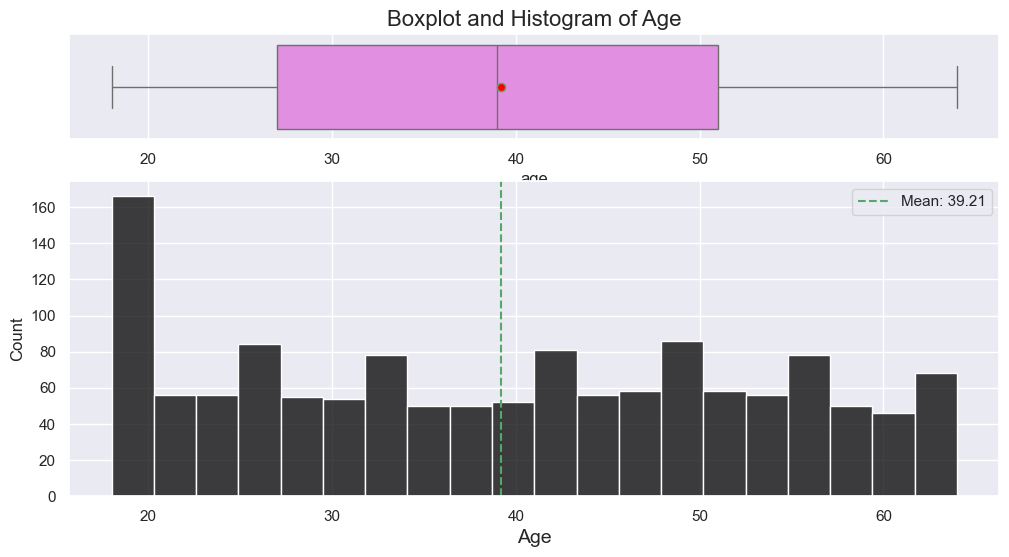

In [34]:
# Define the numerical variable
data = df["age"]

# Calculate the mean
mean_value = np.mean(data)

# Set figure size
fig, ax = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=(12, 6))

# Boxplot (Ensures a single boxplot is displayed)
sns.boxplot(x=data, ax=ax[0], showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red"}, color="violet")

# Histogram
sns.histplot(data, bins=20, kde=False, ax=ax[1], color="black")

# Add vertical line for mean
ax[1].axvline(mean_value, color='g', linestyle='--', label=f"Mean: {mean_value:.2f}")

# Labeling
ax[1].legend()
ax[1].set_xlabel("Age", fontsize=14)
ax[0].set_title("Boxplot and Histogram of Age", fontsize=16)

# Show the plots
plt.show()

* Age seems uniformly distributed, with both mean and median around 40 years

### BMI

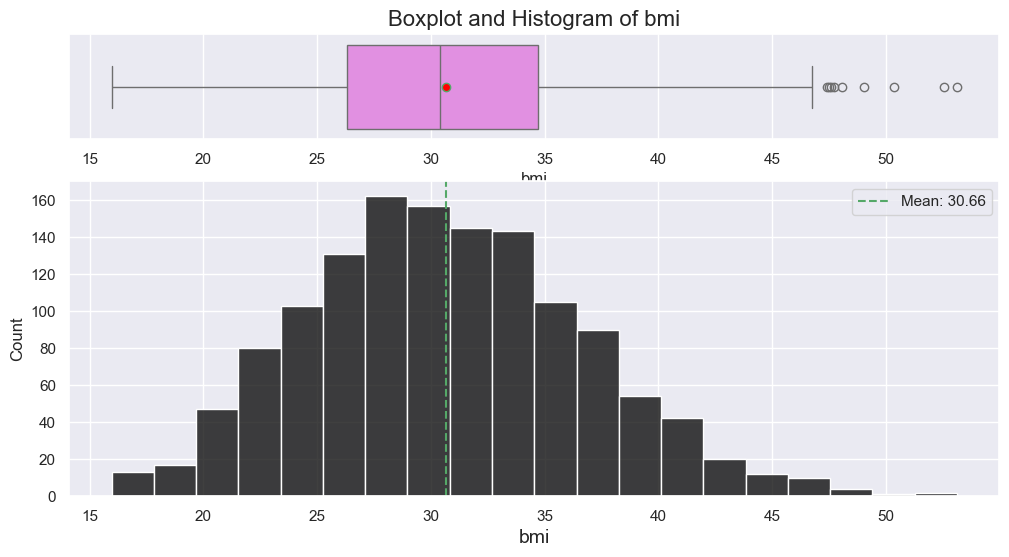

In [37]:
# Define the numerical variable
data = df["bmi"]

# Calculate the mean
mean_value = np.mean(data)

# Set figure size
fig, ax = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=(12, 6))

# Boxplot (Ensures a single boxplot is displayed)
sns.boxplot(x=data, ax=ax[0], showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red"}, color="violet")

# Histogram
sns.histplot(data, bins=20, kde=False, ax=ax[1], color="black")

# Add vertical line for mean
ax[1].axvline(mean_value, color='g', linestyle='--', label=f"Mean: {mean_value:.2f}")

# Labeling
ax[1].legend()
ax[1].set_xlabel("bmi", fontsize=14)
ax[0].set_title("Boxplot and Histogram of bmi", fontsize=16)

# Show the plots
plt.show()

* BMI looks to have a fairly normal distribution. There are couple of people who are over weight.
* Outliers are present

### Children

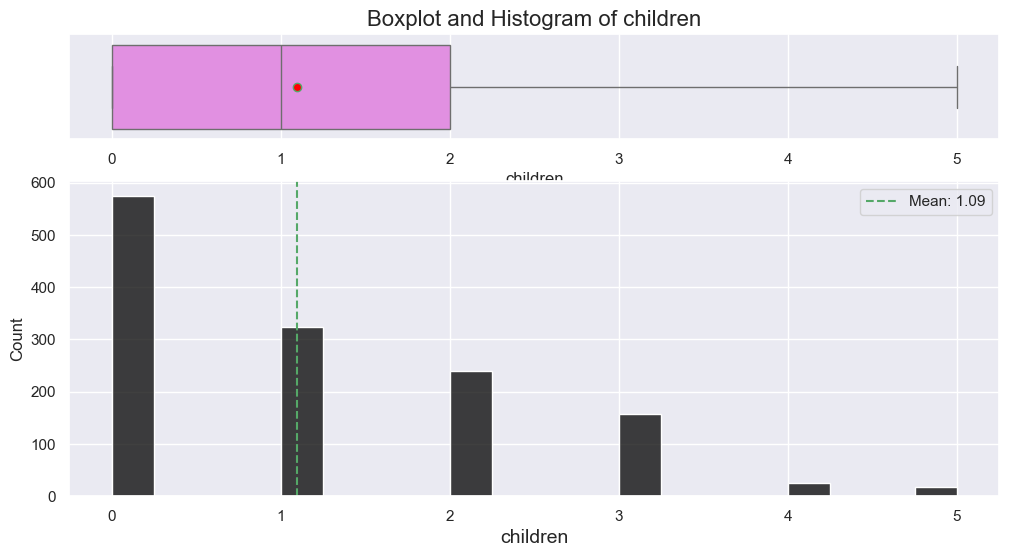

In [40]:
# Define the numerical variable
data = df["children"]

# Calculate the mean
mean_value = np.mean(data)

# Set figure size
fig, ax = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=(12, 6))

# Boxplot (Ensures a single boxplot is displayed)
sns.boxplot(x=data, ax=ax[0], showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red"}, color="violet")

# Histogram
sns.histplot(data, bins=20, kde=False, ax=ax[1], color="black")

# Add vertical line for mean
ax[1].axvline(mean_value, color='g', linestyle='--', label=f"Mean: {mean_value:.2f}")

# Labeling
ax[1].legend()
ax[1].set_xlabel("children", fontsize=14)
ax[0].set_title("Boxplot and Histogram of children", fontsize=16)

# Show the plots
plt.show()

* The number of Children has a right skewed distribution
* The plot suggests that we should convert the children variables to categorical for further analysis

In [42]:
# Converting children to categorical
df['children'] = df['children'].astype('category')

### Charges

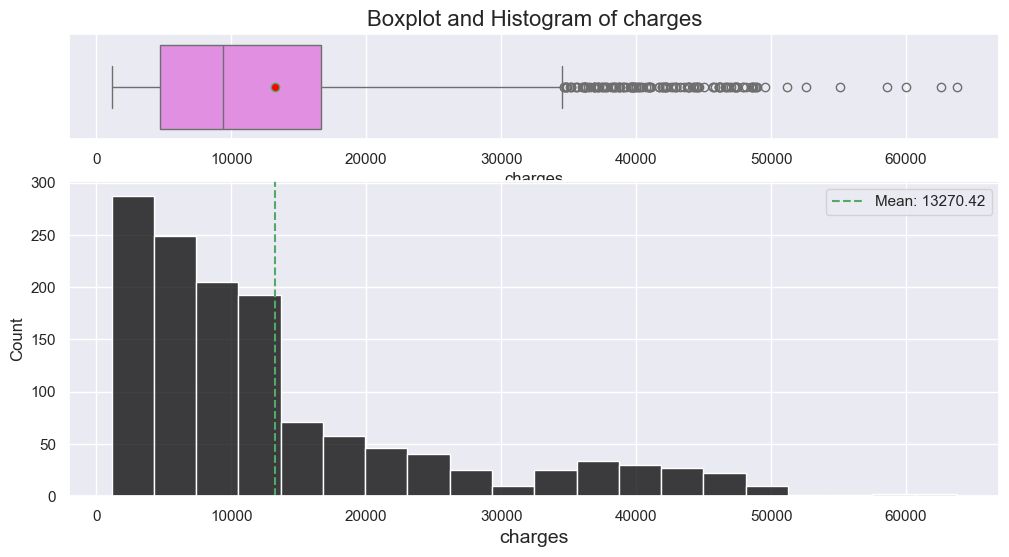

In [44]:
# Define the numerical variable
data = df["charges"]

# Calculate the mean
mean_value = np.mean(data)

# Set figure size
fig, ax = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=(12, 6))

# Boxplot (Ensures a single boxplot is displayed)
sns.boxplot(x=data, ax=ax[0], showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red"}, color="violet")

# Histogram
sns.histplot(data, bins=20, kde=False, ax=ax[1], color="black")

# Add vertical line for mean
ax[1].axvline(mean_value, color='g', linestyle='--', label=f"Mean: {mean_value:.2f}")

# Labeling
ax[1].legend()
ax[1].set_xlabel("charges", fontsize=14)
ax[0].set_title("Boxplot and Histogram of charges", fontsize=16)

# Show the plots
plt.show()

* Charges have a right skewed distribution. The mean charges is higher is higher than the median charges
* This variables has a lot of outliers towards the higher end indicating that some people spend very high on their medicals

In [46]:
print(df.columns)  # Verify available column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [47]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) #length of the column
    for p in ax.patches:
        percentage = '{:.1f}%' .format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(percentage, (x,y), size = 12) # annotate the percentage
    plt.show() # show the plot

### Sex

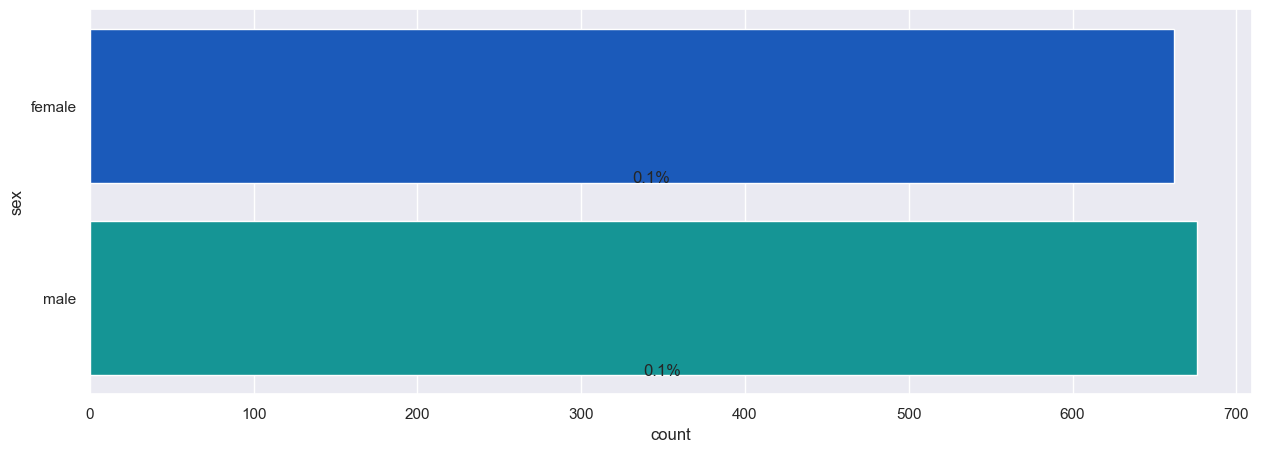

In [49]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["sex"], palette='winter')
perc_on_bar(ax, df["sex"])

* The distribution of observation across genders is fairly similar as we saw earlier as well.

### Children

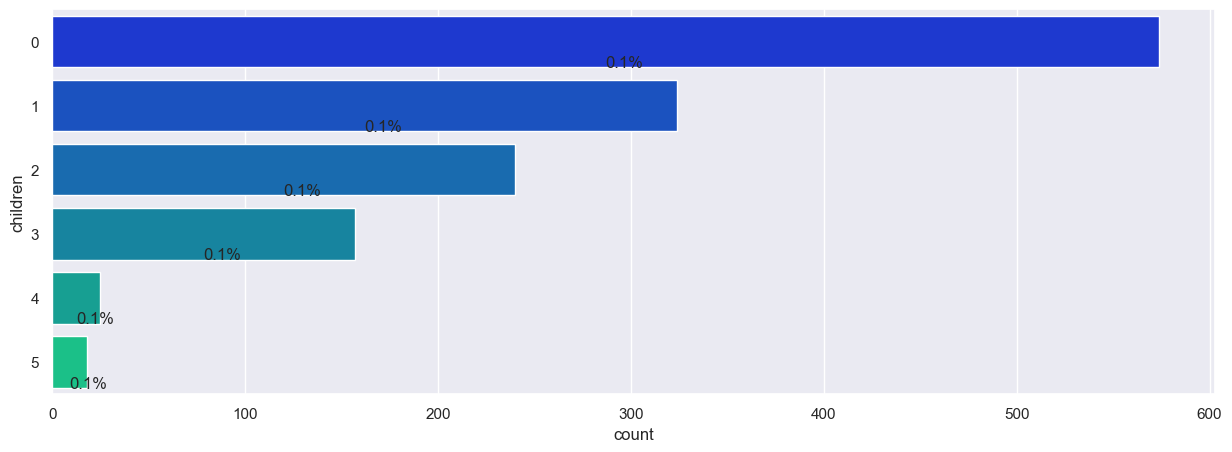

In [52]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["children"], palette='winter')
perc_on_bar(ax,df["children"])

* Nearly 42% insurance holders do not have a child
* Nearly 42% insurance holders have 1 or 2 children

### Smoker

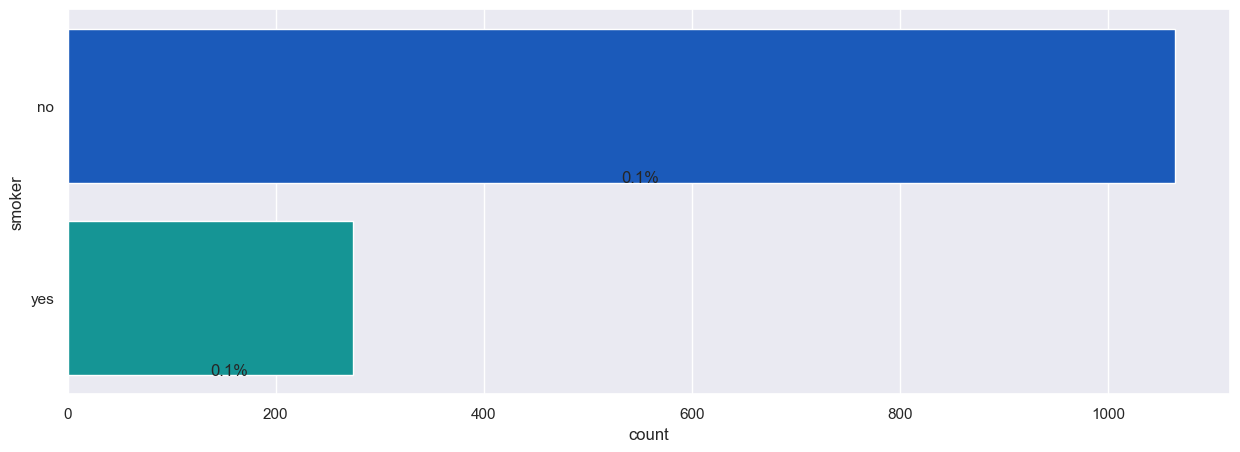

In [55]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"], palette='winter')
perc_on_bar(ax,df["smoker"])

* 20% of the insurance holders are smokers. It will be interesting to see smoking affects the insurance claims

### Region

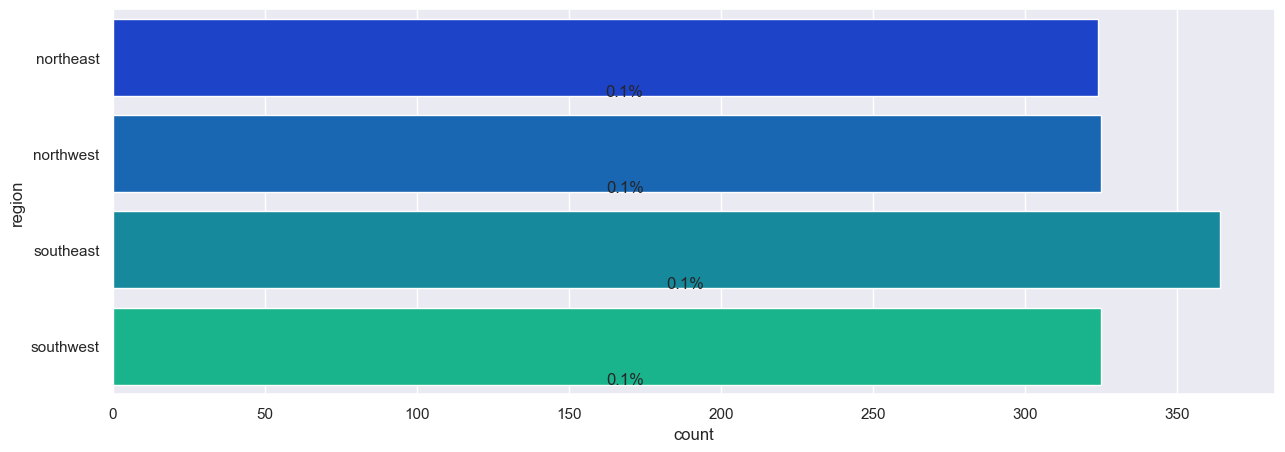

In [58]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"], palette='winter')
perc_on_bar(ax,df["region"])

* The distribution of insurance holders across various regions of US is fairly uniform. South east region does have ~3% more observations as compared to others but we will have to test if this difference is stastically significant.

### Bivariate Analysis

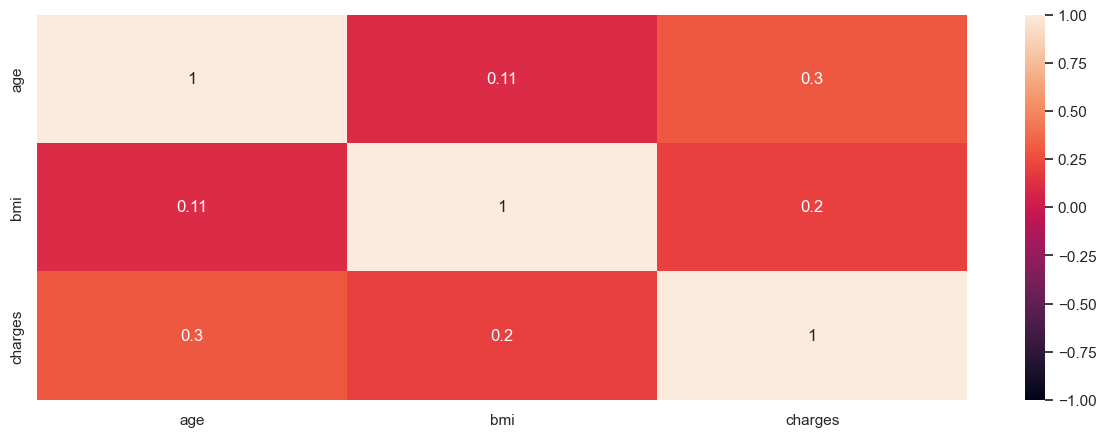

In [61]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(15, 5))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

* The correlation between all the continuous variables is positive but not very high

### Bi-variate distribution of every possible attribute pair

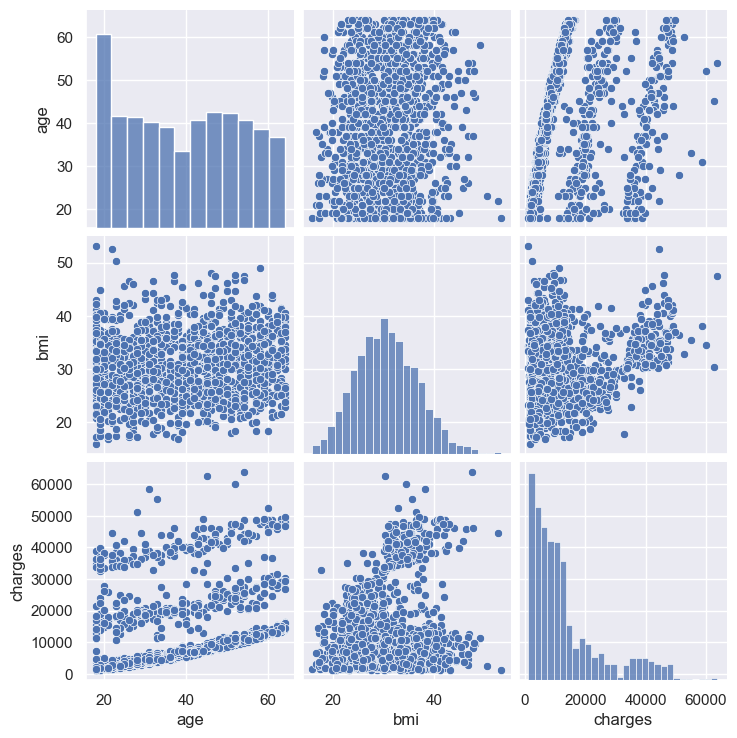

In [64]:
sns.pairplot(df)  #pairplot
plt.show()

* There is an interesting pattern between 'age' and 'charges. I t is possible that for the same ailment, older people are charged more than the younger ones.

### 2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

* Hint - Formulate a hypothesis and prove/disprove it.

In [68]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

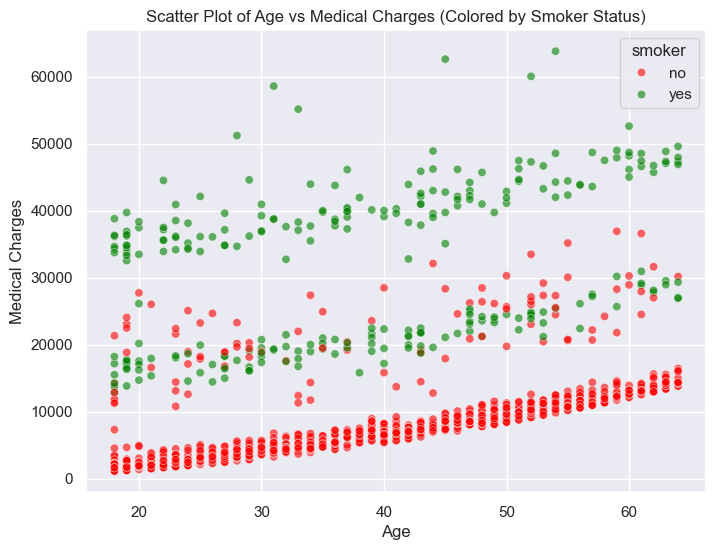

In [69]:
# Scatter plot to look for visual evidence of dependency between smoking and medical costs
# accross different ages
# Scatter plot to analyze dependency between smoking and medical costs across different ages
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, palette=['red', 'green'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.title("Scatter Plot of Age vs Medical Charges (Colored by Smoker Status)")
plt.show()

* Visually the difference between charges of smokers and charges of non-smokers is apparent.
* The non-smokers have much lower medical bills claim compared to the smokers.
* We will have to perform a two sample t-test(independent) to test to check if the mean charges of smokers is significantly greater than the non-smokers.

### T-test to check dependency of charges on smoking attribute

Null Hypothesis =Ho = "Mean charges of smokers is less than or equal to non-smokers."

Alternate Hypothesiis=Ha= "Mean charges of smokers is greater than non-smokers."

This will be a one-tailed t-test.
    
Signifcance Level = 0.05

In [73]:
Ho = "Mean charges of smokers is less than or equal to non-smokers"
Ha = "Mean charges of smokers is greater than non-smokers"

x = np.array(df[df.smoker == 'yes']. charges) # corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

#x = df[df.smoker == 'yes'].charges
#y = df[df.smoker == 'no'].charges

t, p_value = stats.ttest_ind(x,y, alternative = 'greater') #performing an independent t-test

# Alternatively,
#t, p_value = stats.ttest_ind(x,y) #performing an independent t-test
#p_value = p_value/2 #since it is one tailed test

print("Tstat:", t,"P-value:", p_value)

Tstat: 46.66492117272371 P-value: 4.135717921089551e-283


Note: The value of the test statistic does not change for a to-tailed test or a one-tailed test. Only the p_value associated with the test statistic changes.

In [75]:
if p_value < 0.05: # Setting our significance level at 5%
    print(f'{Ho} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ha} as the p_value ({p_value}) >0.05')

Mean charges of smokers is less than or equal to non-smokers as the p_value (4.135717921089551e-283) < 0.05


We have the statistical evidence to state that the medical claims made by smokers are higher than the claims made by non-smokers.

### 3. Prove (or disprove) with statistical evidence that BMI of female is different from that of males.

In [78]:
df.sex.value_counts()  #checking the distribution of males and females

sex
male      676
female    662
Name: count, dtype: int64

### Mean BMI of females in the data

In [80]:
np.mean(df[df.sex == 'female'].bmi)

30.37774924471299

### Mean BMI of males in the data

In [82]:
np.mean(df[df.sex == 'male'].bmi)

30.943128698224854

In the sample, the mean BMI of males is greater than females. But we will need to perform a t-test to check if this result is statistically significant or just by random chance.

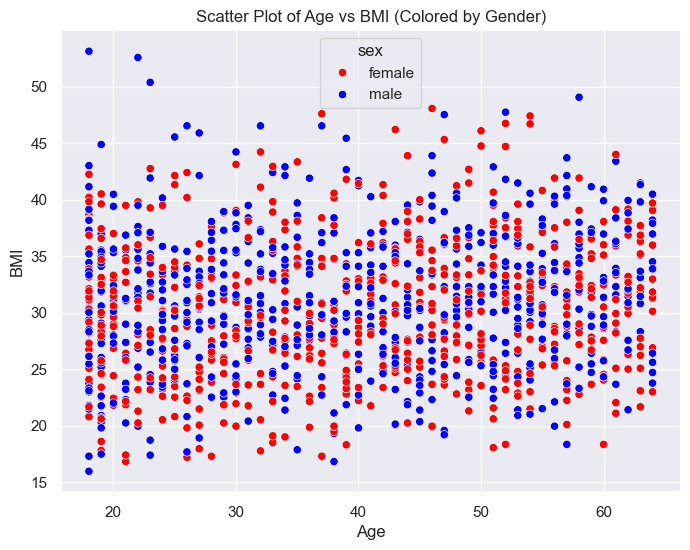

In [84]:
# Scatter plot to look for visual evidence of dependencey between gender and BMI
# accross different ages
# Scatter plot to analyze dependency between gender and BMI across different ages
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="bmi", hue="sex", data=df, palette=['red', 'blue'])

# Labels and title
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Scatter Plot of Age vs BMI (Colored by Gender)")
plt.show()

* Visually, there is no apparent relation between gender and BMI

### T-test to check dependency of BMI on gender attribute

Null Hypothesis = Ho = "Mean BMI of females is same as that of males"

Alternate Hypothesis = Ha = "Mean BMI of females is different from males"

This will be a two-tailed t-test.

    signifance Level = 0.05

In [87]:
# T-test to check dependency of bmi on gender
Ho = "BMI Females is samw as BMI Males" # stating the Null Hypothesis
Ha = "BMI Females is different from BMI Males" # Stating the Alternative Hypothesis

x= np.array(df[df.sex == 'male'].bmi) # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value = stats.ttest_ind(x,y) # performing an independent t-test
p_value

0.08997637178984932

In [88]:
if p_value < 0.05: # Setting our significance level at 5%
    print(f'We reject the Null Hypothesis that the BMI Females same as that of BMI Males, as the p_value({p_value}) > 0.05')
else:
    print(f'We fail to reject the Null Hypothesis that the BMI of Females is same as that of BMI of Males, as the p_value ({p_value}) >0.05')

We fail to reject the Null Hypothesis that the BMI of Females is same as that of BMI of Males, as the p_value (0.08997637178984932) >0.05


There is no statistical difference in the BMI of males and females

### 4. Is the proportion of smokers significantly different across different regions?

* Hint:
1. Create a contingency table/cross tab
2. Use the function:stats.chi2_contigency()

In [92]:
# Checking the distribution of smokers across different regions
pd.crosstab(df['smoker'], df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [165]:
pd.crosstab(df['smoker'], df['region']).plot(kind="bar", figsize=(8,8), stacked=True);

### Chi-sq test to check if smoking habits are different for different regions

Null Hypothesis = Ho = "Region has no effect on smoking habits"

Alternate Hypothesis = Ha = "Region has an effect on smoking habits"

Significance Level = 0.05

In [139]:
# Chi_square test to check if smoking habits are different across different regions

Ho = "Region has no effect on smoking habits" # stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"  # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['region'],df['smoker'])  #Contingency table of region and smoker attributes

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

p_value

0.06171954839170541

In [141]:
if p_value< 0.05: #Setting our significance levelat 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) <0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Region has no effect on smoking habits as the p_value (0.062) > 0.05


The proportion of smokers across different regions is same, as p_value is greater than significant level of 0.05

### 5. Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

In [147]:
#checking the distribution of bmi across women with different number of children
df.groupby(['sex', 'children'])['bmi'].mean()

sex     children
female  0           30.361522
        1           30.052658
        2           30.649790
        3           30.436429
        4           31.943182
        5           30.620625
male    0           30.741719
        1           31.166145
        2           31.300992
        3           30.922937
        4           30.957500
        5           28.792500
Name: bmi, dtype: float64

* The BMI of women with 0, 1 and 2 children does not look very different, but we need to test if this difference is statistically significant or not.

#### Aanalysis of Variance test (ANOVA) to check if bmi values for females having different number of children, are significzntly different.

Null Hypothesis = Ho = "No. of children has an effect on bmi"

Significance Level = 0.05

In [155]:
Ho = "No. of children has no effect on bmi"  # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"  #Stating the Alternate Hypothesis

female_df = df[df['sex'] =='female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero, one, two)

p_value

0.7158579926754841

In [159]:
if p_value < 0.05: #stating our significance level at 5%
    print (f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}0 > 0.05')

No. of children has no effect on bmi as the p_value (0.7160 > 0.05


We failed to reject the Null Hypothesis. The mean BMI of women with different number of children is not statistically different.

### Conclusion
* The claims made by smoker are higher as compared to the non-smokers. We should create personalised policies for these customer categories.

* Very few people have more than 2 children. 75% of the people have 2 children or less children. However number of children has no effect on BMI of the women insurance holders.
    
* BMI has a slight positive correlation with the medical claims.